In [2]:
## Support Vector Machine 
import numpy as np

# case =1
# x_train = np.array([ [1, 8], [3, 8], [5, 1], [-6, -1], [7, 3], [8, 7]]).reshape(6,2)
# y_train = np.array([-1, 1, 1, -1, 1, -1]).reshape(6,1)

# case = 2
# x_train = np.array([[1, 7], [2, 8], [3, 8], [5, 1], [6, -1], [7, 3]]).reshape(6,2)
# y_train = np.array([1, 1, 1, -1, -1, -1]).reshape(6,1)

# case = 3
# data = [
#  [-0.62813787 , 2.17555329],
#  [-2.30928855 , 2.6731255 ],
#  [-2.25663018 , 1.63217428],
#  [ 3.27373362 ,-2.29195267],
#  [-0.65517605 ,-1.65448206],
#  [ 1.60448355 ,-2.28913686]
# ]
# y = np.array([ 1. , 1.,  1., -1., -1. ,-1.])

case = 4
X = np.array([
    [27.65, 15.65],
    [23.1 , 14.6 ],
    [23.5 , 15.2 ],
    [24.05, 14.9 ],
    [24.5 , 14.7 ],
    [14.15, 17.35],
    [14.3 , 16.8 ],
    [14.3 , 15.75],
    [14.75, 15.1 ],
    [15.35, 15.5 ]
])

y = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1])

x_train = X.reshape(10,2)
y_train = y.reshape(10,1)


train_f1 = x_train[:,0]
train_f2 = x_train[:,1]

train_f1 = train_f1.reshape(10,1)
train_f2 = train_f2.reshape(10,1)

w1 = np.ones((10,1))
w2 = np.ones((10,1))
b = np.zeros((10,1))

w1_arr = []
w2_arr = []
b_arr = []

epochs = 0
alpha = 0.0001
epochs_total = 500
ct = 1/500

while(epochs < epochs_total):
    y = w1 * train_f1 + w2 * train_f2 + b
    prod = y * y_train
    print(epochs, end = "\r")
    count = 0
    for val in prod:
        if(val >= 1):
            cost = 0
            w1 = w1 - alpha * (1 * ct * w1)
            w2 = w2 - alpha * (1 * ct * w2)
            
        else:
            cost = 1 - val 
            w1 = w1 + alpha * (train_f1[count] * y_train[count] - 1 * ct * w1)
            w2 = w2 + alpha * (train_f2[count] * y_train[count] - 1 * ct * w2)
            b = b + alpha * y_train[count]
        count += 1
    epochs += 1
    w1_arr.append(w1.mean())
    w2_arr.append(w2.mean())
    b_arr.append(b.mean())
print(len(w1_arr))

500


In [3]:
print(len(w1_arr))

500


500
500
500


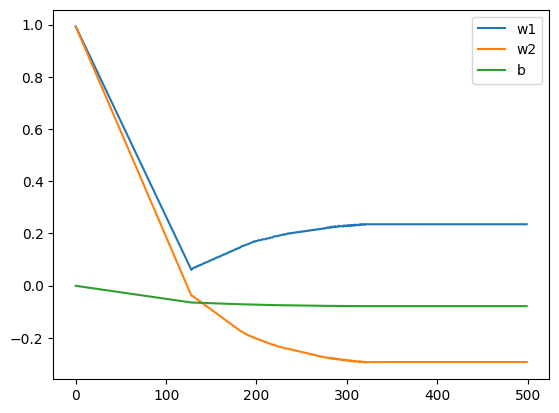

Final w1:  0.23520001498707618
Final w2:  -0.2925257410696117
Final b:  -0.07830000000000123


In [4]:
import matplotlib.pyplot as plt
print(len(w1_arr))
print(len(w2_arr))
print(len(b_arr))
plt.plot(w1_arr, label= "w1")
plt.plot(w2_arr, label = "w2")
plt.plot(b_arr, label = "b")
plt.legend()
plt.show()

print("Final w1: ", w1_arr[-1])
print("Final w2: ", w2_arr[-1])
print("Final b: ", b_arr[-1])

In [5]:
# write the weights to a file
import csv
with open("weights.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(["w1", "w2", "b"])
    writer.writerow(w1_arr)
    writer.writerow(w2_arr)
    writer.writerow(b_arr)

In [6]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation

# # Generate mock data (replace this with your actual data)
# weights_history =  [(w1_arr[i], w2_arr[i]) for i in range(len(w1_arr))]
# bias_history = [0 for i in range(len(w1_arr))]

# num_frames = len(weights_history)

# print("Number of frames: ", num_frames)


# # Set up the plot
# fig, ax = plt.subplots(figsize=(8, 8))
# ax.set_xlim(-10, 10)
# ax.set_ylim(-10, 10)


# points = x_train
# labels = y_train

# lr=0.0001

# # Initialize scatter plot for points
# scatter = ax.scatter(points[:, 0], points[:, 1], c=labels, cmap='coolwarm')

# # Initialize line for hyperplane
# line, = ax.plot([], [], 'g-', lw=2)

# # Text for displaying current frame
# frame_text = ax.text(0.02, 0.98, '', transform=ax.transAxes, va='top')

# def init():
#     return scatter, line, frame_text

# def update(frame):
#     # Update hyperplane
#     print(frame, end='\r')
#     w1, w2 = weights_history[frame]
#     b = bias_history[frame]
    
#     x = np.array([-10, 10])
#     y = (-w1 * x - b) / w2
    
#     line.set_data(x, y)
    
#     # Update frame text
#     frame_text.set_text(f'Frame: {frame}')
    
#     return scatter, line, frame_text

# # Create animation
# anim = FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True, interval=100)

# plt.title("Hyperplane and Training Points Animation Case: "+ str(case) + " lr =" + str(lr) + " epochs = " + str(epochs))
# plt.show()

# # Uncomment the following line to save the animation as a gif
# title = "hyperplane_animation scikit Case: " + str(case)  + "lr =" + str(lr) + " epochs = " + str(epochs) + ".mp4"
# anim.save(title, writer='ffmpeg', fps=30)

In [7]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.svm import SVC
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# # Generate synthetic 2D data
# X = np.array([
#     [27.65, 15.65],
#     [23.1 , 14.6 ],
#     [23.5 , 15.2 ],
#     [24.05, 14.9 ],
#     [24.5 , 14.7 ],
#     [14.15, 17.35],
#     [14.3 , 16.8 ],
#     [14.3 , 15.75],
#     [14.75, 15.1 ],
#     [15.35, 15.5 ]
# ])

# y = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1])
# # Split into training and testing sets

# # Standardize the data
# scaler = StandardScaler()
# X = scaler.fit_transform(X)


# # Train SVM classifier with a linear kernel
# svm = SVC(kernel='linear')
# svm.fit(X, y)

# # Plot decision boundary
# def plot_decision_boundary(model, X, y):
#     xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
#                          np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
    
#     plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
#     plt.xlabel("Feature 1")
#     plt.ylabel("Feature 2")
#     plt.title("SVM Decision Boundary")
#     plt.show()

# # Plot decision boundary for training data
# plot_decision_boundary(svm, X, y)

# w = svm.coef_[0]
# b = svm.intercept_[0]
# print(f"Weights: {w}")
# print(f"Bias: {b}")


In [8]:
# visualising real vs predicted weights

import matplotlib.pyplot as plt
import numpy as np

# reading the svm weights
import csv
w1_svm = []
w2_svm = []
b_svm = []

with open("./svm_weights.csv", "r") as f:
    reader = csv.reader(f)
    for row in reader:
        w1_svm.append(row[0])
        w2_svm.append(row[1])
        b_svm.append(row[2])

w1_svm = w1_svm[1:] 
w2_svm = w2_svm[1:]
b_svm = b_svm[1:]
w1_svm = [float(i) for i in w1_svm]
w2_svm = [float(i) for i in w2_svm]
b_svm = [float(i) for i in b_svm]
w1_svm = np.array(w1_svm)
w2_svm = np.array(w2_svm)
b_svm = np.array(b_svm)

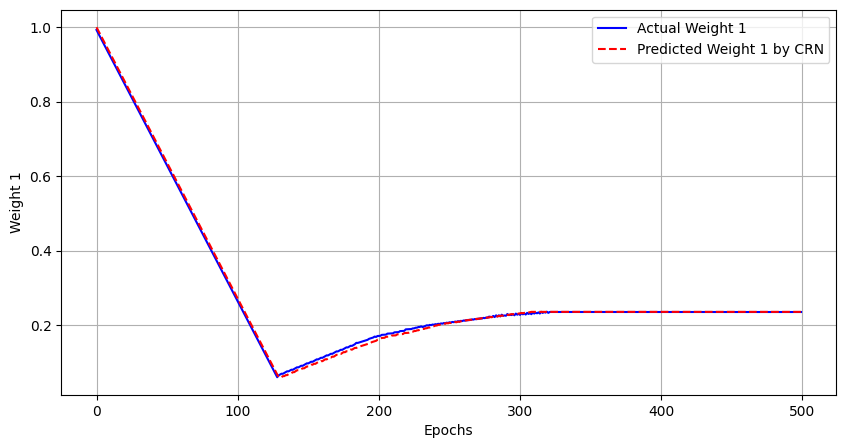

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual arrays)
epochs = np.arange(0, len(w1_arr))
actual_weights = w1_arr
predicted_weights = w1_svm

# Plot
plt.figure(figsize=(10, 5))
plt.plot(epochs, actual_weights, label="Actual Weight 1", linestyle='-', color='blue')
plt.plot(epochs, predicted_weights, label="Predicted Weight 1 by CRN", linestyle='--', color='red')

# Labels and title
plt.xlabel("Epochs")
plt.ylabel("Weight 1")
# plt.title("Actual vs Predicted Weight 1 Over Epochs")
plt.legend()
plt.grid(True)

# Show the plot
plt.savefig("weight1.png")  
plt.show()


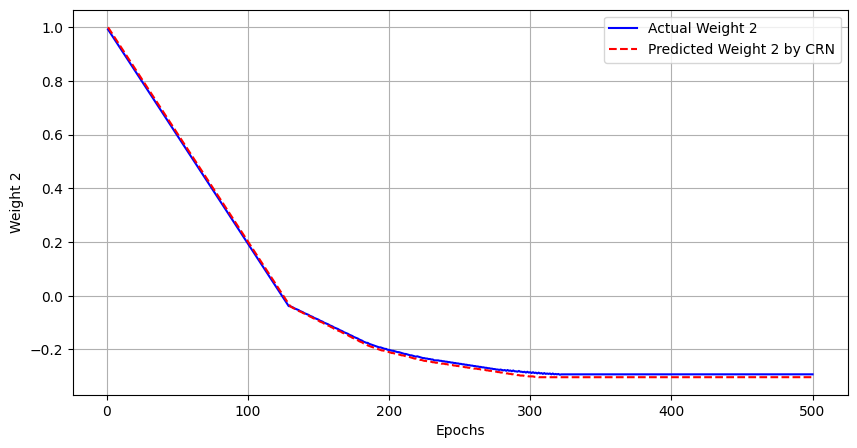

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual arrays)
epochs = np.arange(1, 501)  # 500 epochs
actual_weights = w2_arr
predicted_weights = w2_svm

# Plot
plt.figure(figsize=(10, 5))
plt.plot(epochs, actual_weights, label="Actual Weight 2", linestyle='-', color='blue')
plt.plot(epochs, predicted_weights, label="Predicted Weight 2 by CRN", linestyle='--', color='red')

# Labels and title
plt.xlabel("Epochs")
plt.ylabel("Weight 2")
# plt.title("Actual vs Predicted Weight 2 Over Epochs")
plt.legend()
plt.grid(True)

# Show the plot
plt.savefig("weight2.png")
plt.show()


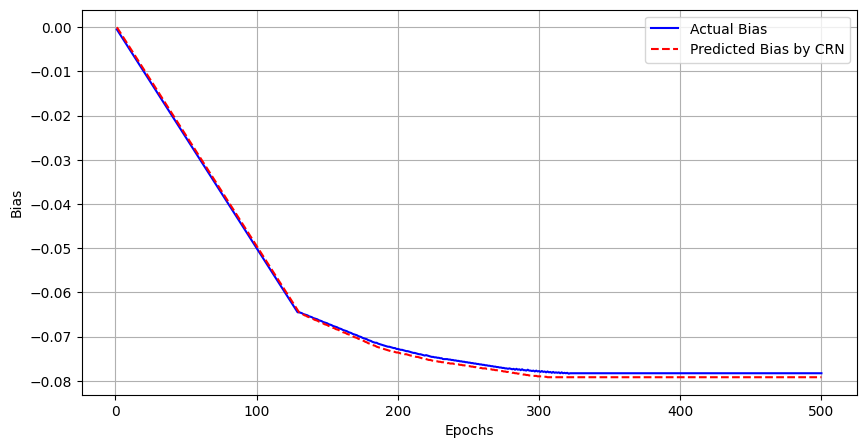

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual arrays)
epochs = np.arange(1, 501)  # 500 epochs
actual_weights = b_arr
predicted_weights = b_svm

# Plot
plt.figure(figsize=(10, 5))
plt.plot(epochs, actual_weights, label="Actual Bias", linestyle='-', color='blue')
plt.plot(epochs, predicted_weights, label="Predicted Bias by CRN", linestyle='--', color='red')

# Labels and title
plt.xlabel("Epochs")
plt.ylabel("Bias")
# plt.title("Actual vs Predicted Bias Over Epochs")
plt.legend()
plt.grid(True)

# Show the plot
plt.savefig("bias.png")
plt.show()


In [12]:

print("Final w1: ", w1_arr[-1],"Final w1 svm: ", w1_svm[-1], "Difference: ", w1_arr[-1] - w1_svm[-1])
print("Final w2: ", w2_arr[-1],"Final w2 svm: ", w2_svm[-1], "Difference: ", w2_arr[-1] - w2_svm[-1])
print("Final b: ", b_arr[-1],"Final b svm: ", b_svm[-1], "Difference: ", b_arr[-1] - b_svm[-1])

# average error
w1_error = np.abs(w1_arr[-1] - w1_svm[-1])/np.abs(w1_arr[-1])
w2_error = np.abs(w2_arr[-1] - w2_svm[-1])/np.abs(w2_arr[-1])
b_error = np.abs(b_arr[-1] - b_svm[-1])/np.abs(b_arr[-1])
print("w1_svm", np.round(w1_svm[-1], 4))
print("w2_svm", np.round(w2_svm[-1], 4))
print("b_svm", np.round(b_svm[-1], 4))
print("w1_crn", np.round(w1_arr[-1], 4))
print("w2_crn", np.round(w2_arr[-1], 4))
print("b_crn", np.round(b_arr[-1], 4))
# w1_error = np.round(w1_error, 4)
# w2_error = np.round(w2_error, 4)
# b_error = np.round(b_error, 4)
print("Average Error in w1: ", w1_error)
print("Average Error in w2: ", w2_error)
print("Average Error in b: ", b_error)
print("Average Error: ", (w1_error + w2_error + b_error)/3)


Final w1:  0.23520001498707618 Final w1 svm:  0.23556166576880333 Difference:  -0.0003616507817271464
Final w2:  -0.2925257410696117 Final w2 svm:  -0.3031688873348155 Difference:  0.010643146265203796
Final b:  -0.07830000000000123 Final b svm:  -0.0792000430284219 Difference:  0.0009000430284206717
w1_svm 0.2356
w2_svm -0.3032
b_svm -0.0792
w1_crn 0.2352
w2_crn -0.2925
b_crn -0.0783
Average Error in w1:  0.0015376307767115509
Average Error in w2:  0.03638362294643694
Average Error in b:  0.011494802406394094
Average Error:  0.01647201870984753


In [13]:
X = np.array([
    [27.65, 15.65],
    [23.1 , 14.6 ],
    [23.5 , 15.2 ],
    [24.05, 14.9 ],
    [24.5 , 14.7 ],
    [14.15, 17.35],
    [14.3 , 16.8 ],
    [14.3 , 15.75],
    [14.75, 15.1 ],
    [15.35, 15.5 ]
])

y = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1])


(300, 300)


/tmp/ipykernel_1420/605889719.py:36: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z1, levels=[0], colors="black", linewidths=2, label=labels[0])
/tmp/ipykernel_1420/605889719.py:37: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z2, levels=[0], colors="blue", linewidths=2, linestyles="dashed", label=labels[1])


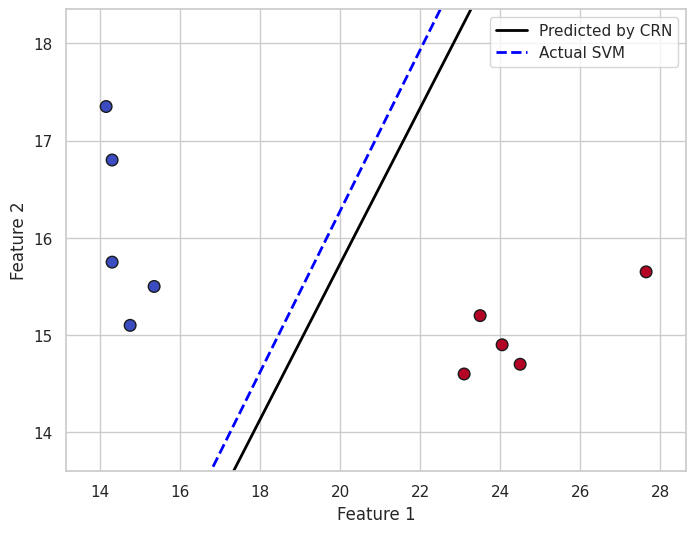

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_svm_decision_boundaries(X, y, weights1, bias1, weights2, bias2, labels=("Boundary 1", "Boundary 2")):
    """
    Plots two SVM decision boundaries on the same plot with appropriate labels.

    Parameters:
        X (numpy.ndarray): 2D array of shape (n_samples, 2) with feature values.
        y (numpy.ndarray): 1D array of shape (n_samples,) with class labels (0 or 1).
        weights1 (numpy.ndarray): 1D array of shape (2,) for the first boundary.
        bias1 (float): Bias term for the first decision boundary.
        weights2 (numpy.ndarray): 1D array of shape (2,) for the second boundary.
        bias2 (float): Bias term for the second decision boundary.
        labels (tuple): Labels for the decision boundaries.
    """
    sns.set(style="whitegrid")

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    print(xx.shape)

    # Compute decision boundary for first model
    Z1 = weights1[0] * xx + weights1[1] * yy + bias1
    Z1 = Z1.reshape(xx.shape)

    # Compute decision boundary for second model
    Z2 = weights2[0] * xx + weights2[1] * yy + bias2
    Z2 = Z2.reshape(xx.shape)

    # Plot the decision boundaries
    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z1, levels=[0], colors="black", linewidths=2, label=labels[0])
    plt.contour(xx, yy, Z2, levels=[0], colors="blue", linewidths=2, linestyles="dashed", label=labels[1])

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k", s=70)

    # Add legend for decision boundaries
    plt.plot([], [], color="black", linewidth=2, label=labels[0])  # Solid line label
    plt.plot([], [], color="blue", linewidth=2, linestyle="dashed", label=labels[1])  # Dashed line label

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    # plt.title("Comparison of Two SVM Decision Boundaries")
    plt.legend()
    plt.show()

plot_svm_decision_boundaries(X, y, [np.round(w1_svm[-1], 2), np.round(w2_svm[-1], 2)], np.round(b_svm[-1], 2), [np.round(w1_arr[-1], 2), np.round(w2_arr[-1], 2)], np.round(b_arr[-1], 2), labels=("Predicted by CRN", "Actual SVM"))

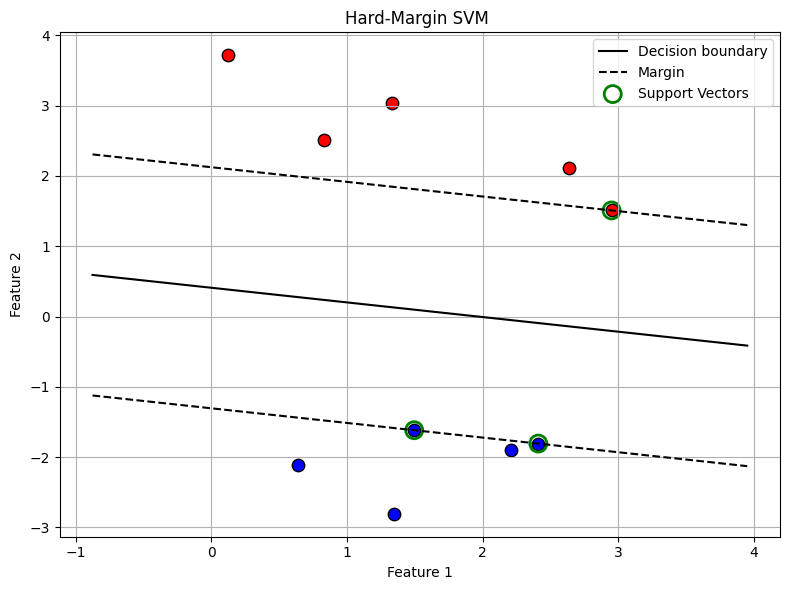

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Generate a linearly separable dataset
X, y = make_classification(n_samples=10, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, class_sep=2.0, random_state=42)
y = 2 * y - 1  # Convert labels from {0,1} to {-1,1}

# Train a hard-margin SVM (C -> very large)
svm = SVC(kernel='linear', C=1e10)
svm.fit(X, y)

# Get the separating hyperplane
w = svm.coef_[0]
b = svm.intercept_[0]
xx = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1)
yy = -(w[0] * xx + b) / w[1]

# Compute the margin lines
margin = 1 / np.linalg.norm(w)
yy_down = yy - np.sqrt(1 + (w[0] / w[1])**2) * margin
yy_up = yy + np.sqrt(1 + (w[0] / w[1])**2) * margin

# Plot everything
plt.figure(figsize=(8, 6))
plt.plot(xx, yy, 'k-', label="Decision boundary")
plt.plot(xx, yy_down, 'k--', label="Margin")
plt.plot(xx, yy_up, 'k--')
# write the line equation 
# plt.text(0.5, 0.5, f"y = {-w[0]/w[1]:.2f}x + {b/w[1]:.2f}", fontsize=12, color='black')

# Plot the data points and support vectors
colors = ['blue' if label == -1 else 'red' for label in y]
for i, (point, label) in enumerate(zip(X, y)):
    plt.scatter(*point, c=colors[i], s=80, edgecolors='k', marker='o')
    # plt.text(point[0]+0.1, point[1], str(label), fontsize=12)

# Highlight support vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], 
            s=150, facecolors='none', edgecolors='green', linewidths=2, label='Support Vectors')

plt.legend()
plt.title("Hard-Margin SVM ")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()
